<a href="https://colab.research.google.com/github/Mahdi-Kriaa/faulty_water_pumps_predicton/blob/main/faulty_water_pumps_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1

**1. Source of data**

The data for this project comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

Link to dataset : https://www.kaggle.com/datasets/sumeetsawant/pump-it-up-challenge-driven-data?select=training_Set_values.csv

**2. Data description**

The dataset provides detailed insights into various aspects of water pumps. It includes critical information such as the geographical coordinates of the pumps, the management type of pumps, the source of water, and the quality and quantity of water that each pump can extract. Moreover, it provides the operational status of each pump, indicating whether it is functional, non-functional, or requires repair. It also includes data about the population each pump serves, offering valuable insights into the scale of its impact.


**3. What is the target?**

The target is the status_group variable, which indicates whether the pump is functional, non-functional, or functional but needs repair.

**4. What does one row represent?**

A row represent a record in a set of conditions

**5. Is this a classification or regression problem?**

Classification problem

**6. How many features does the data have?**

40 features (at least, 7 features will be removed because they dont represent a useful information like "id" or they are almost represented by other features like "extraction_type_class" and "extraction_type_group")

**7. How many rows are in the dataset?**

59400 rows

**8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

- Dealing with missing values
- Dealing with imbalanced classes

# Project 2 - Part 2

## EDA and Data Preprocessing

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [37]:
file_id_features = "1QrNFlZxrLb2vl0zY96LXgNJctH6zprdr"
file_id_target = "1DKPsAit8BHV3TQp1l8tDH6pVMxTTM6O1"
df_features = pd.read_csv(f"https://docs.google.com/uc?id={file_id_features}")
df_target = pd.read_csv(f"https://docs.google.com/uc?id={file_id_target}")

In [38]:
pd.set_option('display.max_columns', None)

In [39]:
print(df_features.shape)
df_features.head(20)

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [40]:
df_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [41]:
print(df_target.shape)
df_target.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [42]:
df_pumps = df_features.merge(df_target,on="id").reset_index()

In [43]:
# cardinal of categorical features
df_pumps["num_private"] = df_pumps["num_private"].astype("object")
cat_list = df_pumps.select_dtypes("object").columns.delete(0)
for e in cat_list :
  print(f"{e}: {len(df_pumps[e].unique())}")

funder: 1898
installer: 2146
wpt_name: 37400
num_private: 65
basin: 9
subvillage: 19288
region: 21
lga: 125
ward: 2092
public_meeting: 3
recorded_by: 1
scheme_management: 13
scheme_name: 2697
permit: 3
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6
status_group: 3


In [44]:
# calculate number of classes that have less than n samples
def class_counts(data,c,n=1,normalize=False) :
  df_test = data[c].value_counts() <= n
  if normalize :
      return len(df_test[df_test==True])/data.shape[0]
  else :
      return len(df_test[df_test==True])

In [45]:
# Normalized number of one-sample classes
for c in cat_list :
  print(f"{c}: {round(class_counts(df_pumps,c,1,True),2)}")

funder: 0.02
installer: 0.02
wpt_name: 0.55
num_private: 0.0
basin: 0.0
subvillage: 0.16
region: 0.0
lga: 0.0
ward: 0.0
public_meeting: 0.0
recorded_by: 0.0
scheme_management: 0.0
scheme_name: 0.01
permit: 0.0
extraction_type: 0.0
extraction_type_group: 0.0
extraction_type_class: 0.0
management: 0.0
management_group: 0.0
payment: 0.0
payment_type: 0.0
water_quality: 0.0
quality_group: 0.0
quantity: 0.0
quantity_group: 0.0
source: 0.0
source_type: 0.0
source_class: 0.0
waterpoint_type: 0.0
waterpoint_type_group: 0.0
status_group: 0.0


there is too much one-sample classes for the wpt_name and subvillage features, so they are useless, for the other features, only rows will be dropped as this wont cause a significant loss of information

In [46]:
# drop one-sample classes
drop_list = ["funder","installer","scheme_name"]
for c in drop_list :
  df_test = df_pumps[c].value_counts()==1
  classes = df_test[df_test==True].index
  df_pumps.drop(df_pumps[df_pumps[c].isin(classes)].index, inplace = True)

In [47]:
# check identical values in two columns
def   check_identical_columns(data,c1,c2,include_na=False) :
          data.reset_index(drop=True,inplace=True)
          n = data.shape[0]
          j = 0
          for i in range(n):
            if data.loc[i,c1] == data.loc[i,c2] :
                j += 1
            if include_na :
                if np.isnan(data.loc[i,c1]) | np.isnan(data.loc[i,c2]) :
                  j += 1
          return j/n

In [48]:
# check columns that seem to present same information
print("extraction_type / extraction_type_group :",check_identical_columns(df_pumps,"extraction_type","extraction_type_group"))
print("extraction_type / extraction_type_class :",check_identical_columns(df_pumps,"extraction_type","extraction_type_class"))
print("payment / payment_type :",check_identical_columns(df_pumps,"payment","payment_type"))
print("water_quality / quality_group :",check_identical_columns(df_pumps,"water_quality","quality_group"))
print("quantity / quantity_group :",check_identical_columns(df_pumps,"quantity","quantity_group"))
print("source / source_type :",check_identical_columns(df_pumps,"source","source_type"))
print("waterpoint_type / waterpoint_type_group :",check_identical_columns(df_pumps,"waterpoint_type","waterpoint_type_group"))

extraction_type / extraction_type_group : 0.96
extraction_type / extraction_type_class : 0.6393181818181818
payment / payment_type : 0.5801923076923077
water_quality / quality_group : 0.12751748251748252
quantity / quantity_group : 1.0
source / source_type : 0.6231468531468531
waterpoint_type / waterpoint_type_group : 0.8974300699300699


Except the "water_quality / quality_group" pair, columns in each these pairs represent almost the same information so we can drop one of theme.

<Axes: xlabel='quality_group', ylabel='water_quality'>

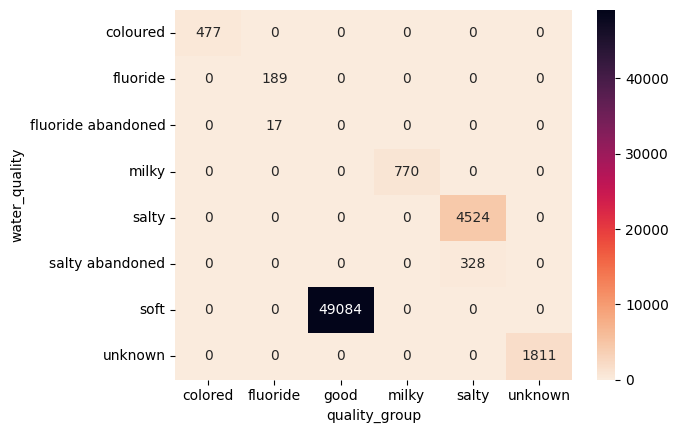

In [49]:
# disply contingency matrix for "water_quality" and "quality_group" features
contingency_table = pd.crosstab(df_pumps['water_quality'],df_pumps['quality_group'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="rocket_r")

these two features represent almost the same information so we can drop the "quality group" column (it provide slightly less detailed information)

<Axes: xlabel='region_code', ylabel='region'>

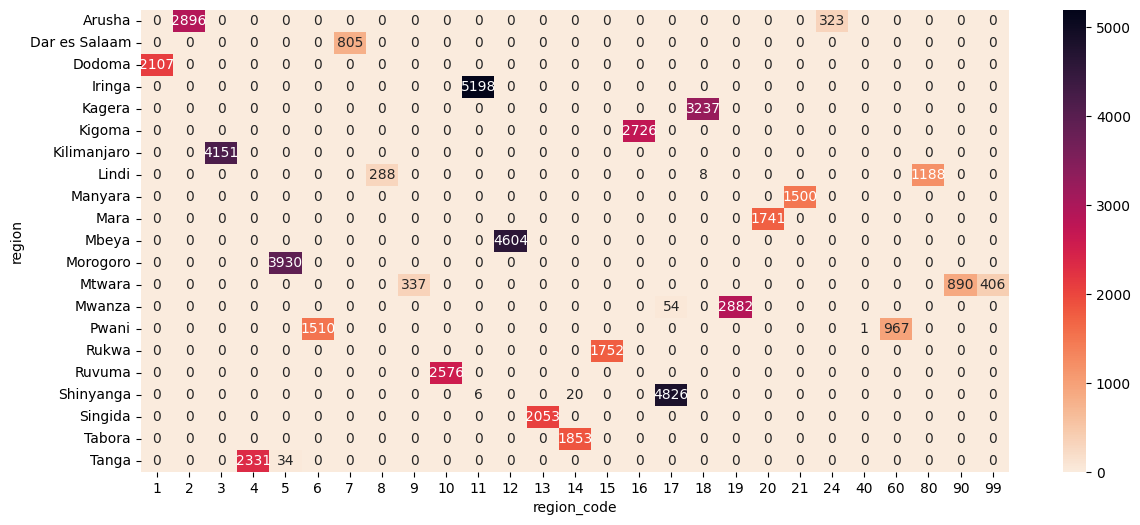

In [50]:
# disply contingency matrix for "region" and "region_code" features to verify inconsistencies
plt.figure(figsize=(14,6))
contingency_table = pd.crosstab(df_pumps['region'],df_pumps['region_code'])
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="rocket_r")

Some regions have more than one code, so the "region_code" feature will be dropped as we already have the "region" feature.

<Axes: xlabel='district_code', ylabel='lga'>

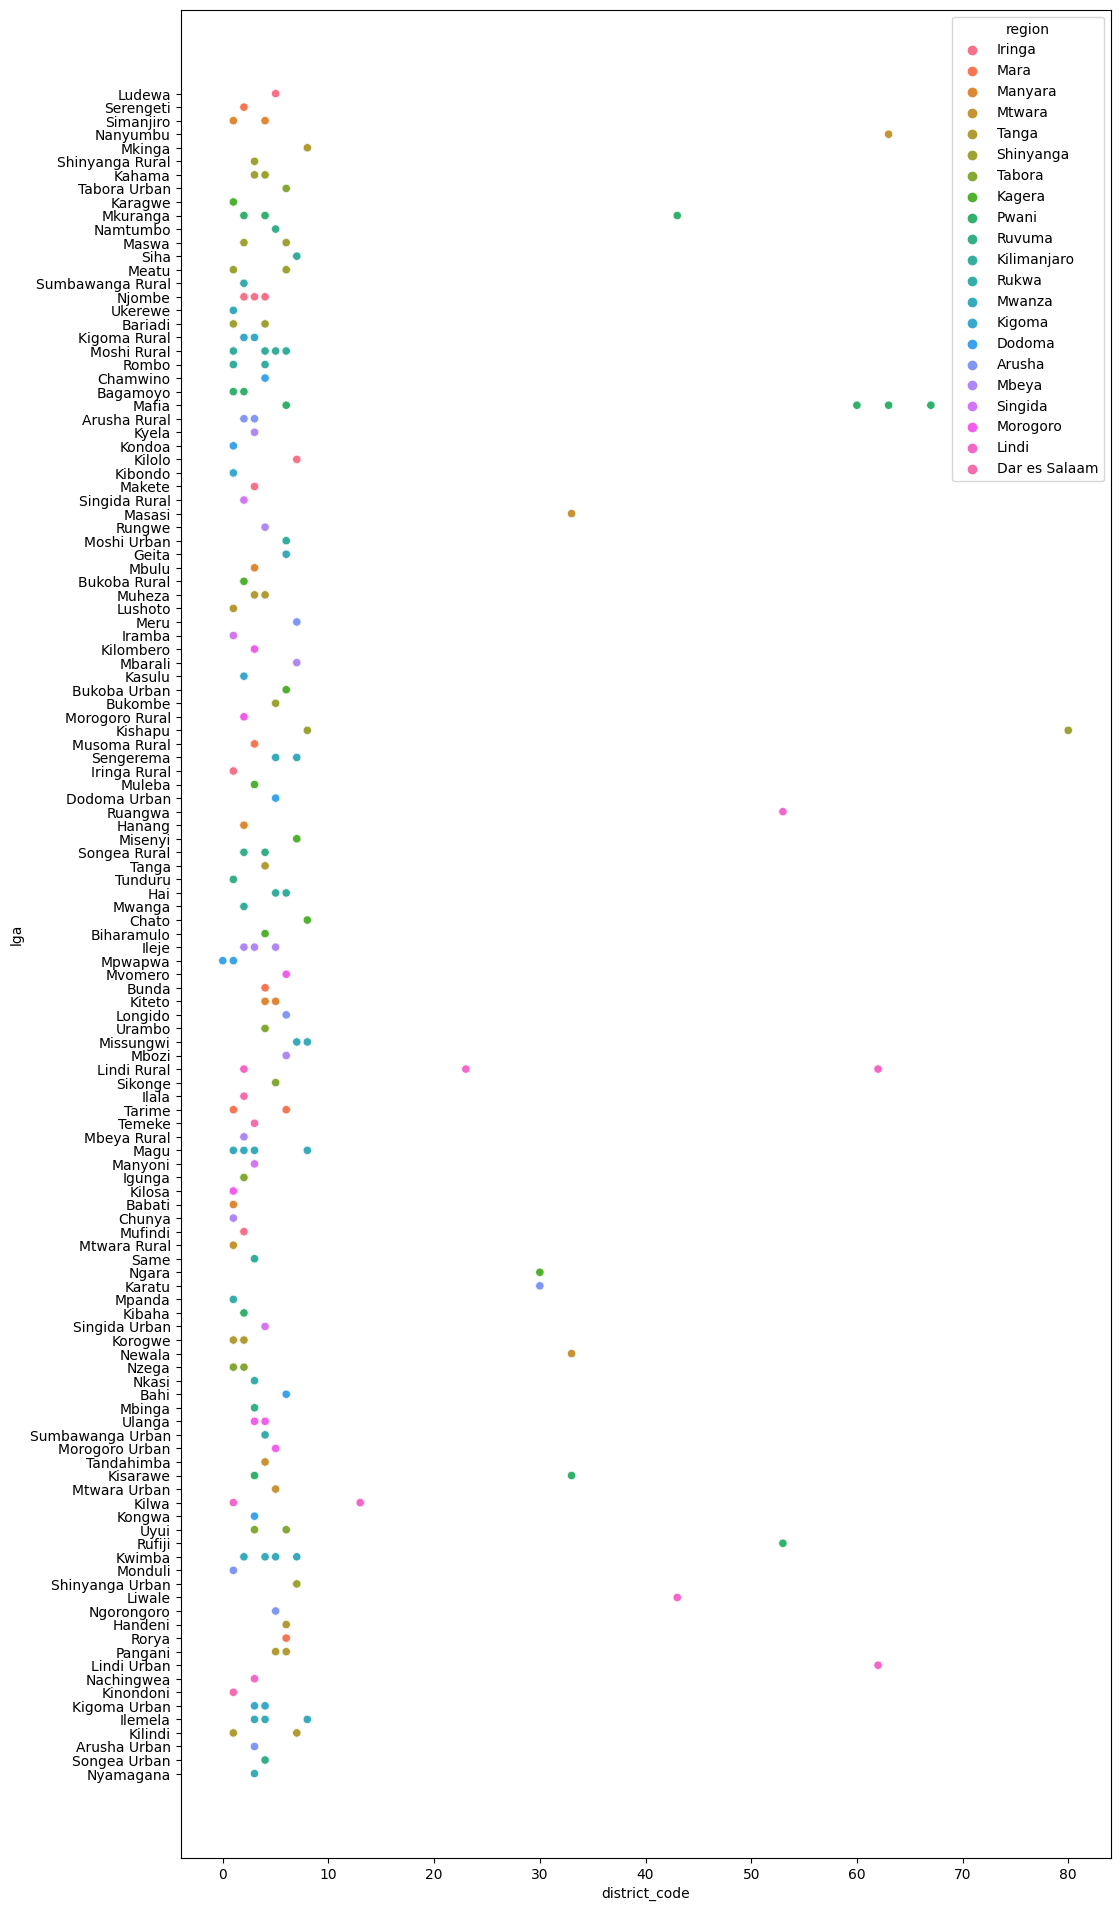

In [51]:
# disply scatter for "district_code" and "lga" features (lga represent the district name) to verify inconsistencies
plt.figure(figsize=(12,24))
sns.scatterplot(data=df_pumps,x="district_code",y="lga",hue="region")

Some districts have more than one code, so they will be dropped as we already have the district name (lga)

In [52]:
# drop duplicate rows
df_pumps.drop_duplicates(inplace=True)
df_pumps.shape

(57200, 42)

In [53]:
cat_list = df_pumps.select_dtypes("object").columns.delete(0)
for c in cat_list :
  print(f"* {c}: {df_pumps[c].unique()}")

* funder: ['Roman' 'Grumeti' 'Lottery Club' 'Unicef' 'Mkinga Distric Coun' 'Dwsp'
 'Rwssp' 'Wateraid' 'Isingiro Ho' 'Private' 'Danida' 'World Vision'
 'Lawatefuka Water Supply' 'Biore' 'Rudep' 'Hesawa' 'Twe'
 'African Development Bank' 'Government Of Tanzania' 'Water'
 'Private Individual' 'Undp' nan 'Not Known' 'Kirde' 'Cefa' 'Ces(gmbh)'
 'European Union' 'Lga' 'District Council' 'Muwsa' 'Dwe/norad'
 'Kkkt_makwale' 'Sawaka' 'Ces (gmbh)' 'Olgilai Village Community' 'Kkkt'
 'Roman Catholic' 'Norad' 'Adra' 'Sema' 'Dwe' 'Rc Church'
 'Swisland/ Mount Meru Flowers' 'Ifad' 'Swedish' 'Idc' 'He' 'Jica' 'Aict'
 'Tcrs' 'Kiuma' 'Germany Republi' 'Netherlands' 'Ruthe'
 'Tulawaka Gold Mine' 'Nethalan' 'Tasaf' 'Concern World Wide' 'Wfp' 'Lips'
 'Sida' 'World Bank' 'Tanza' '0' 'Sw' 'Shipo' 'Fini Water' 'Kanisa'
 'Oxfarm' 'Village Council' 'Hesawz' 'Shanta' 'Fpct' 'Wvt' 'Dhv' 'Ir'
 'Oikos E.Afrika' 'Anglican Church' 'Peters' 'Donor' 'Secondary Schoo'
 'Amref' 'Adb' 'Jbg' 'Germany' 'Isf' 'Kibaha Town C

In [54]:
# replace missing values that are not in nan format by nan
df_pumps.replace(["unknown","None"],np.nan,inplace=True)

In [55]:
# display normalized number of missing values
(df_pumps.isna().sum())/df_pumps.shape[0]

index                    0.000000
id                       0.000000
amount_tsh               0.000000
date_recorded            0.000000
funder                   0.063462
gps_height               0.000000
installer                0.063584
longitude                0.000000
latitude                 0.000000
wpt_name                 0.000035
num_private              0.000000
basin                    0.000000
subvillage               0.006311
region                   0.000000
region_code              0.000000
district_code            0.000000
lga                      0.000000
ward                     0.000000
population               0.000000
public_meeting           0.055105
recorded_by              0.000000
scheme_management        0.065000
scheme_name              0.485035
permit                   0.051923
construction_year        0.000000
extraction_type          0.000000
extraction_type_group    0.000000
extraction_type_class    0.000000
management               0.009248
management_gro

there is too much missing values for the "scheme_name" column (48,5%) so this feature will be drppped         

In [56]:
df_pumps.drop(columns=["id","wpt_name","extraction_type_group","extraction_type_class","subvillage","region_code","district_code","quality_group","payment_type","scheme_name","quantity_group","source_type","waterpoint_type_group"],inplace=True)

"id" column was dropped bescause it dont represent a useful information.

In [57]:
int_list = df_pumps.select_dtypes("int").columns
df_pumps[int_list] = df_pumps[int_list].astype("float")

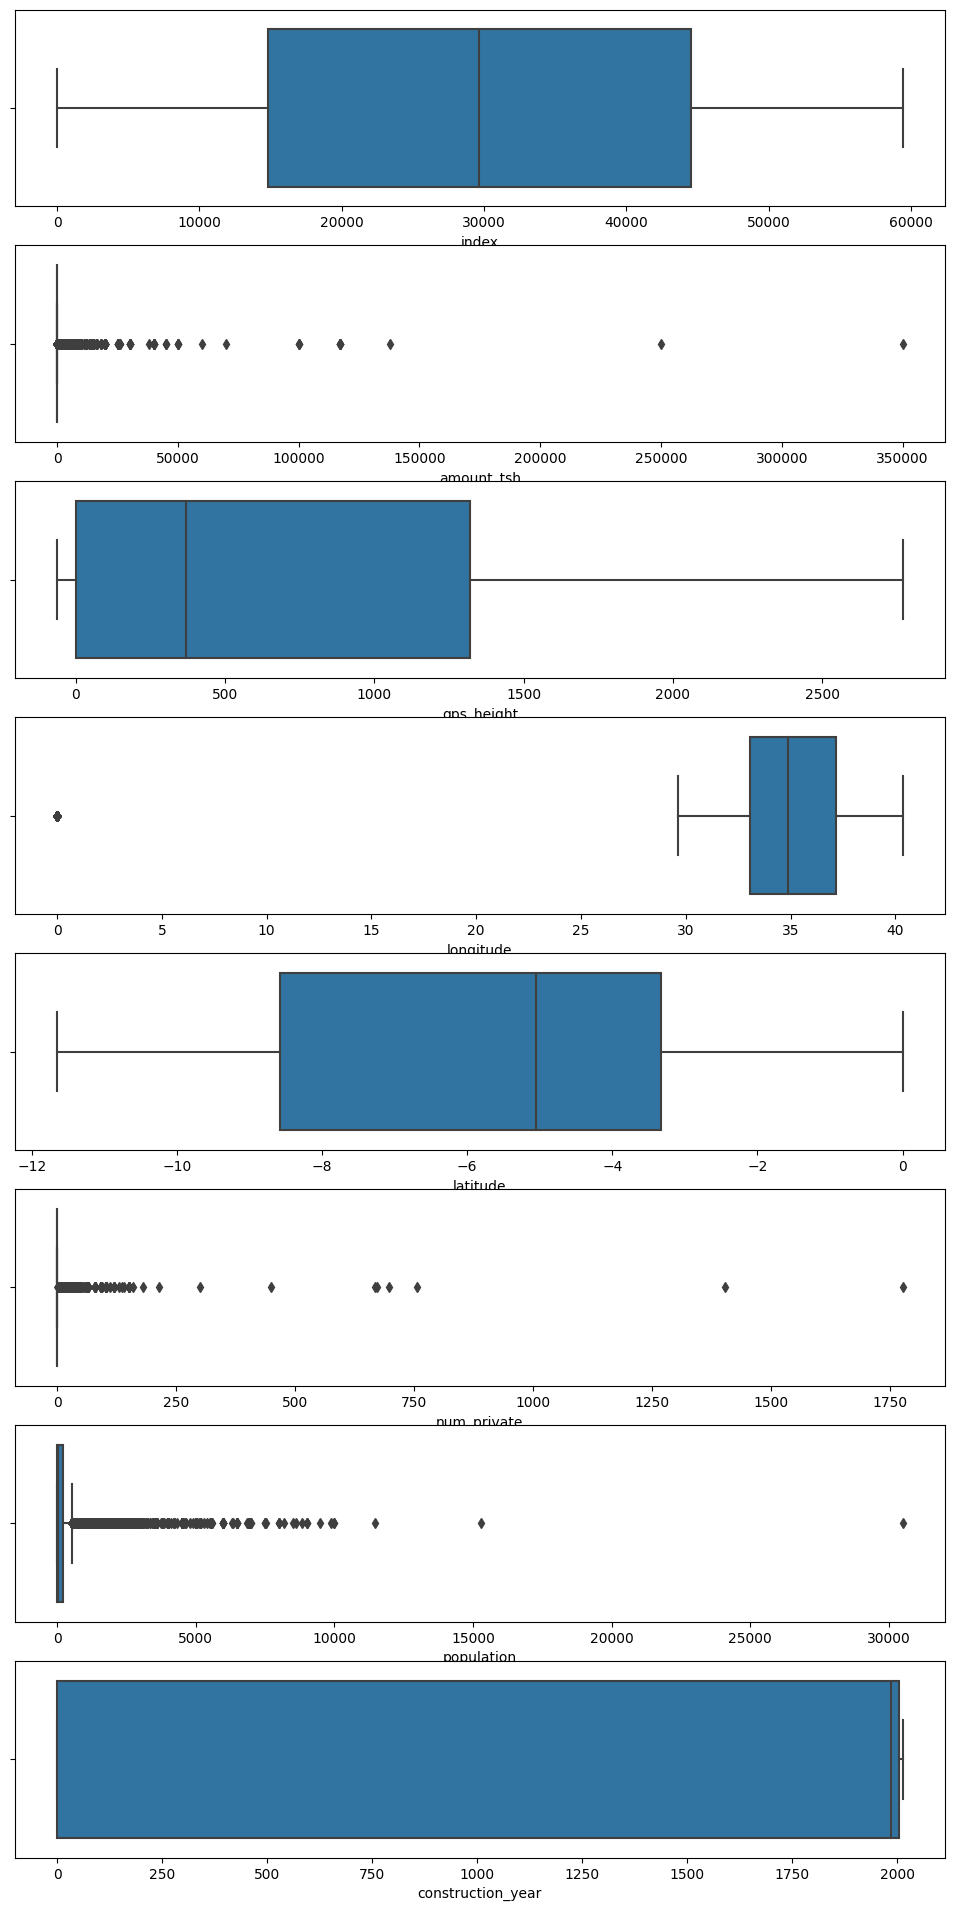

In [58]:
plt.figure(figsize=(12,24))
num_list = df_pumps.select_dtypes("float").columns
for i in range(len(num_list)) :
  plt.subplot(len(num_list),1,i+1)
  sns.boxplot(data=df_pumps,x=num_list[i])

In [59]:
df_pumps["construction_year"].value_counts()

0.0       20041
2010.0     2476
2008.0     2449
2009.0     2399
2000.0     2048
2007.0     1497
2006.0     1393
2003.0     1246
2011.0     1158
2004.0     1073
1978.0     1020
2002.0     1019
1995.0      990
2012.0      959
2005.0      954
1999.0      946
1990.0      942
1998.0      941
1985.0      932
1980.0      798
1996.0      796
1984.0      770
1982.0      730
1994.0      724
1972.0      685
1974.0      663
1997.0      626
1992.0      622
1993.0      602
2001.0      522
1988.0      511
1983.0      483
1986.0      422
1975.0      422
1976.0      409
1970.0      402
1991.0      314
1989.0      301
1987.0      294
1981.0      237
1977.0      194
1979.0      187
1973.0      177
2013.0      164
1971.0      140
1960.0       97
1967.0       85
1963.0       84
1968.0       75
1969.0       58
1964.0       40
1962.0       30
1961.0       19
1966.0       17
1965.0       17
Name: construction_year, dtype: int64

there is too much missing values for the "construction_year" feature but as it is important it will be keeped and missing values will be replaced by the average

In [60]:
mean_year =  df_pumps["construction_year"][df_pumps["construction_year"]!=0].mean().round(0)
df_pumps["construction_year"].replace(0,mean_year,inplace=True)

In [62]:
# create a feature for operating time
df_pumps["record_year"] = pd.to_datetime(df_pumps.date_recorded).dt.year
df_pumps["operating_time"] = df_pumps["record_year"] - df_pumps["construction_year"]
df_pumps.drop(columns=["record_year","construction_year"],inplace=True)

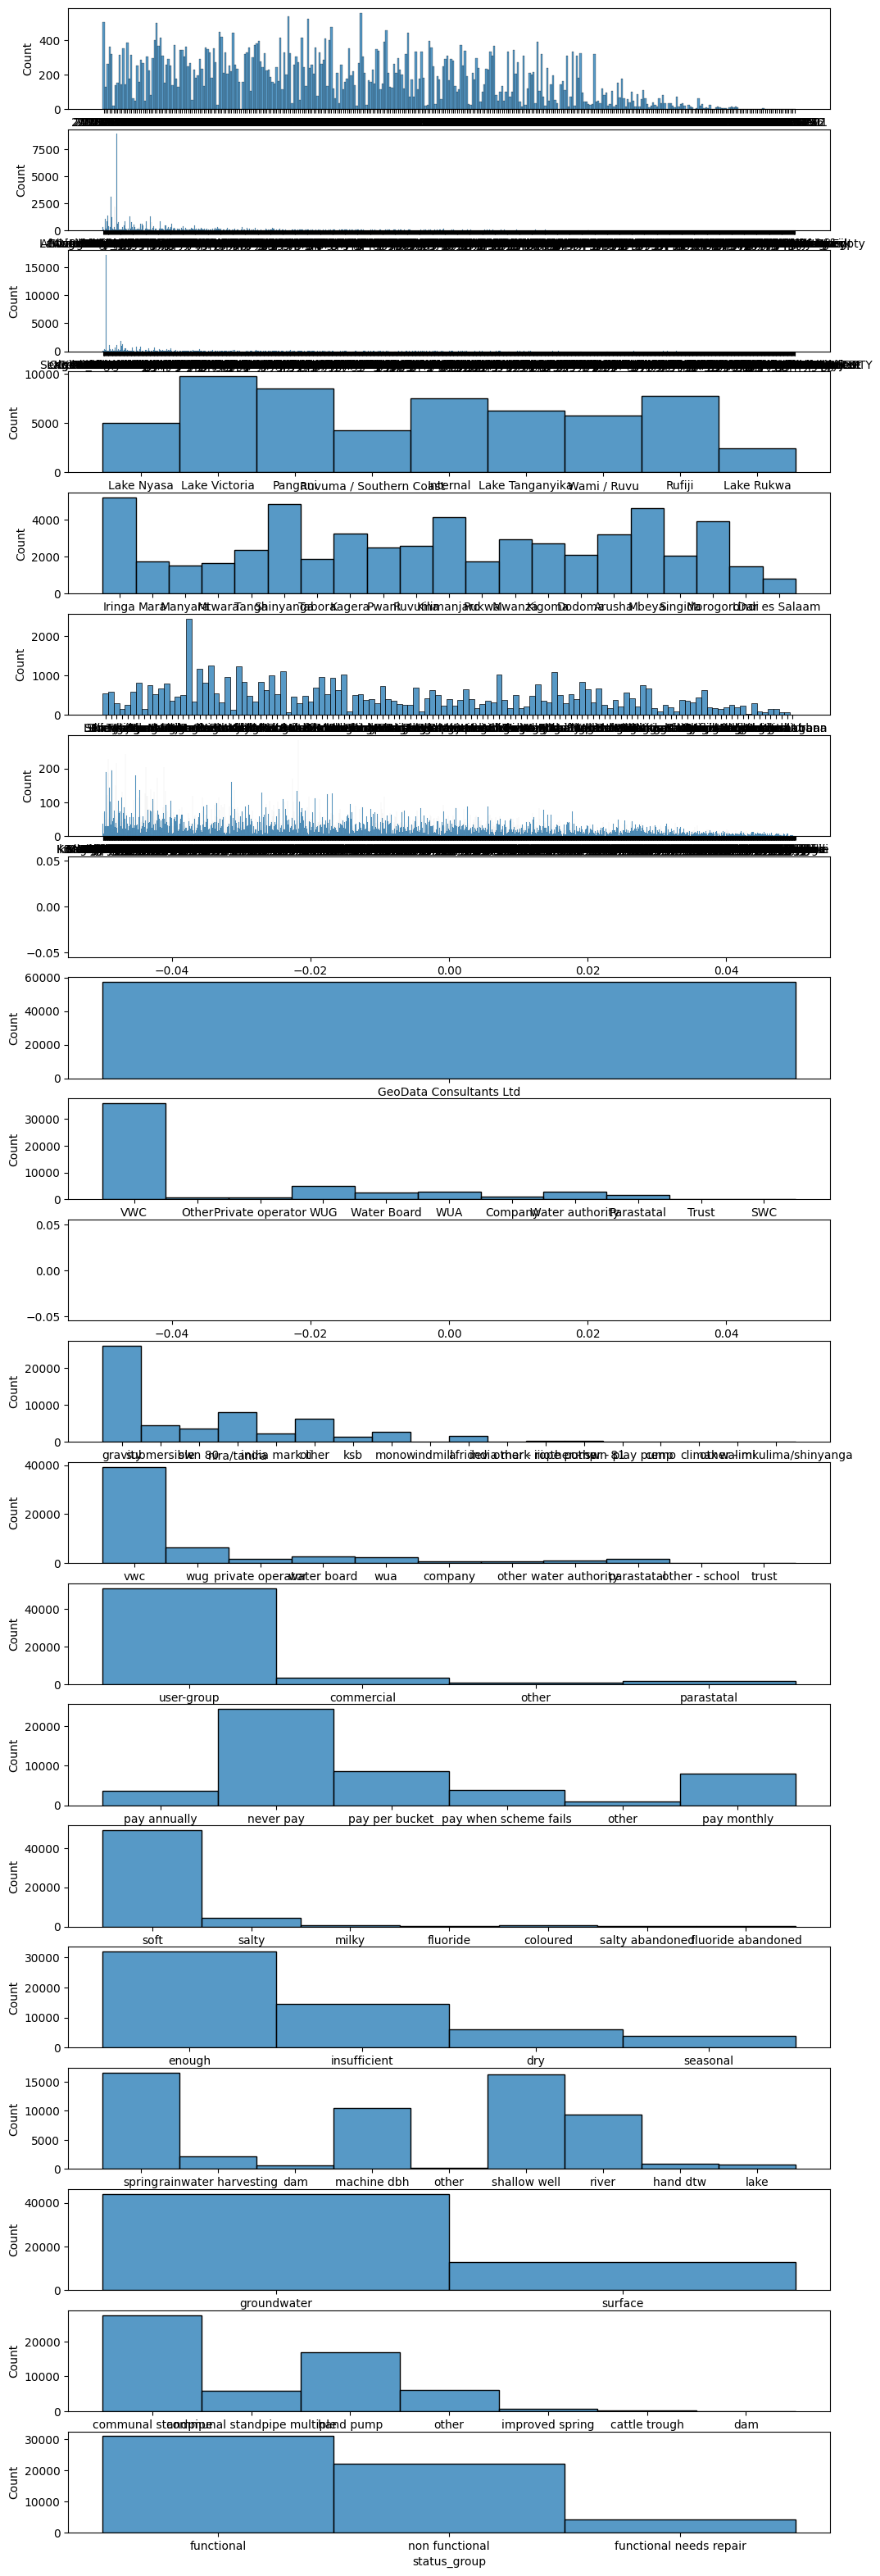

In [63]:
plt.figure(figsize=(12,40))
cat_list = df_pumps.select_dtypes("object").columns
for i in range(len(cat_list)) :
  try :
    plt.subplot(len(cat_list),1,i+1)
    sns.histplot(data=df_pumps,x=cat_list[i])
  except :
    pass

In [65]:
X = df_pumps.drop(columns="status_group")
y= df_pumps["status_group"]

In [68]:
# train test split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [70]:
# create an imputer for missing values
cat_imputer = SimpleImputer(strategy="most_frequent")

In [74]:
# address missing values
cat_list = cat_list.delete(-1)
cat_imputer.fit(X[cat_list])
df_pumps[cat_list] = cat_imputer.transform(df_pumps[cat_list])